## Price Prediction of Real estate using SLR

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression, using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()


## Load the data

In [4]:
data = pd.read_csv('C:/Users//MultisoftFolderTemp//real_estate_price_size.csv')
data.head(10)

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
5,245050.280,575.19
6,265129.064,570.89
7,175716.480,620.82
8,331101.344,682.26
9,218630.608,694.52


# Exploring the data and getting the rough idea

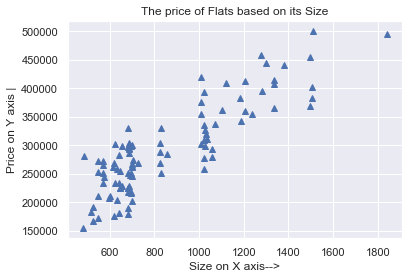

In [13]:
size = data['size']
price = data['price']
plt.figure()
plt.xlabel('Size on X axis-->')
plt.ylabel('Price on Y axis |')
plt.title("The price of Flats based on its Size")
plt.grid(True)
plt.plot(size,price,'b^')
plt.show()


In [14]:
# From this data, we can see that there is a regression between size and the price. As size increases, price also get increases.
# Here we can apply the Linear regression to predict the cases.

## Create the regression

### Declare the dependent and the independent variables

In [30]:
size_independent = data['size']
price_dependent = data['price']

print(size_independent.shape)
print(price_dependent.shape)

(100,)
(100,)


### Training the Data: Here we are taking the 75% of the data for training the model and rest 25% will use to test the data

In [28]:
size_train = size_independent.head(75)
price_train = price_dependent.head(75)

print(size_train.head(5))
print("\n")
print(price_train.head(5))

0     643.09
1     656.22
2     487.29
3    1504.75
4    1275.46
Name: size, dtype: float64


0    234314.144
1    228581.528
2    281626.336
3    401255.608
4    458674.256
Name: price, dtype: float64


### Creating the Model and fitting the data


In [35]:
model=LinearRegression()
# model.fit(size_train, price_train)

# Here we are getting the error "Expected 2D array, got 1D array instead:" after the fit line because the data is in Series which is 1D.
# We need the data in the 2D format, so will use the NDARRAY



### Transform the inputs into a matrix (2D object)

In [43]:
size_train_matrix = size_train.values.reshape(-1,1)
print(size_train_matrix.shape)

# After reshaping the model, we will fit our training the data into the model

model.fit(size_train_matrix,price_train)

(75, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print(model.predict(np.array([200,250,400]).reshape(3,-1)))
print("\n")
print("A 500 sq meter flat will cost me around:",model.predict(np.array([500]).reshape(1,-1)))

[144600.86052423 155985.56047289 190139.66031889]


A 500 sq meter flat will cost me around: [212909.06021623]


### Linear Regression Equation is: Y = Mx + C
### Where Y is the target value, M is the slope or Coefficient, C is the intercept or constant

### Getting the Coefficient or Slope of the train model

In [52]:
print("The slope of the Trained Model is=",model.coef_)

The slope of the Trained Model is= [227.69399897]


### Getting the intersept or constant of the train model

In [51]:
print("The intercept of the Trained Model is=",model.intercept_)

The intercept of the Trained Model is= 99062.06072955934


### Test Cases: Here we will create the test cases and will match the target/Output from 25% of the rest data

In [53]:
#1  
print("Test Instance 1:\n", "Observed Price : An 1183.46\" flat costs $382120.152") 
print("Predicted Price",end=" => ") 
print ('An 1183.46" pizza should cost: $%.2f' % model.predict([1183.46][0]))
print("\n")

#2  Observed Price : 
print("Test Instance 2:\n", "Observed Price A 685.48\" flat costs : $286161.6") 
print("Predicted Price",end=" => ") 
print ('A 685.48" flat should cost: $%.2f' % model.predict([685.48][0]))
print("\n")

#3  Observed Price : 
print("Test Instance 3:\n", "Observed Price An 682.26\" flat costs : $251560.04") 
print("Predicted Price",end=" => ") 
print ('An 1682.26" flat should cost: $%.2f' % model.predict([682.26][0]))
print("\n")

#4  Observed Price : 
print("Test Instance 4:\n", "Observed Price : A 1334.1\" pizza costs $365863.936") 
print("Predicted Price",end=" => ") 
print ('A 1334.1" flat should cost: $%.2f' % model.predict([1334.1][0]))
print("\n")

Test Instance 1:
 Observed Price : An 1183.46" flat costs $382120.152
Predicted Price => An 1183.46" pizza should cost: $368528.80


Test Instance 2:
 Observed Price A 685.48" flat costs : $286161.6
Predicted Price => A 685.48" flat should cost: $255141.74


Test Instance 3:
 Observed Price An 682.26" flat costs : $251560.04
Predicted Price => An 1682.26" flat should cost: $254408.57


Test Instance 4:
 Observed Price : A 1334.1" pizza costs $365863.936
Predicted Price => A 1334.1" flat should cost: $402828.62




In [61]:
print("The R sq of the trained model is=",model.score(size_train_matrix,price_train))

The R sq of the trained model is= 0.7534372266415224


### Regression itself: Here we are creating the test model

In [58]:
size_test = size_independent.tail(25)
price_test = price_dependent.tail(25)

size_test_matrix = size_test.values.reshape(-1,1)
model2=LinearRegression()
model2.fit(size_test_matrix,price_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Calculate the R-squared

In [59]:
print('R-squared: %.4f' % model2.score(size_test_matrix,price_test))

R-squared: 0.7161


### Find the intercept

In [64]:
model2.intercept_

112865.50490210357

### Find the coefficients

In [63]:
model2.coef_

array([207.0312177])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

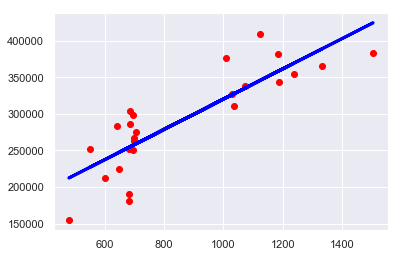

In [65]:
y_pred = model2.predict(size_test_matrix)
# Plot outputs
plt.scatter(size_test_matrix, price_test,  color='red')
plt.plot(size_test_matrix, y_pred, color='blue', linewidth=3)
plt.show()